<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/master/imageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

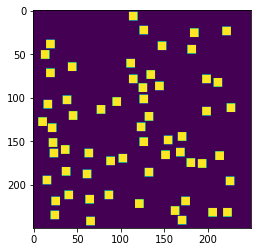

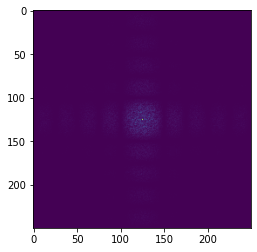

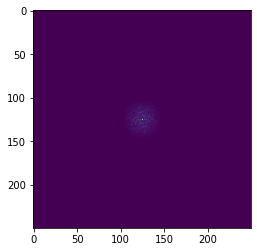

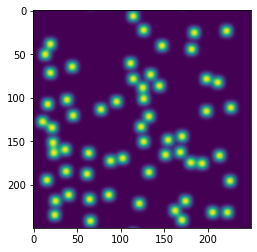

In [1]:
# libraries
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt

# image size, square side length, number of squares
ncols, nrows = 250, 250
sq_size, nsq = 10, 60

# The image array (0=background, 1=square) and boolean array of allowed places
# to add a square so that it doesn't touch another or the image sides
image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)
sq_locs[1:-sq_size-1:,1:-sq_size-1] = True

def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # valid_locs is an array of the indices of True entries in sq_locs
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # pick one such entry at random, and add the square so its top left
    # corner is there; then update sq_locs
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0,i-sq_size-1), max(0, j-sq_size-1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False

# Add the required number of squares to the image
for i in range(nsq):
    place_square()
plt.imshow(image)
plt.show()

# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))
plt.show()


# Build and apply a Gaussian filter.
sigmax, sigmay = 20, 20
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

ftimagep = ftimage * gmask
plt.imshow(np.abs(ftimagep))
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
plt.imshow(np.abs(imagep))
plt.show()

In [2]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   105k      0 --:--:-- --:--:-- --:--:--  107k


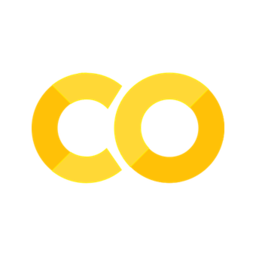

In [3]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

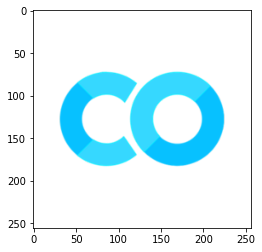

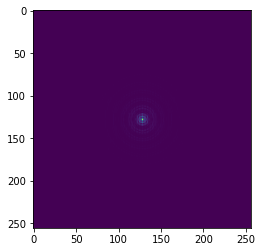

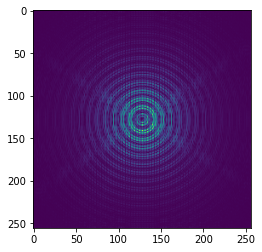

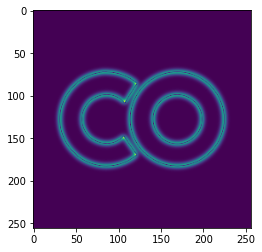

In [17]:
nrows=img.shape[0]
ncols=img.shape[1]

plt.imshow(img)
plt.show()

# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(img[:,:,3])
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))
plt.show()

# Build and apply a reversed Gaussian filter to get outline.
sigmax, sigmay = 20, 20
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = 1-np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

ftimagep = ftimage * gmask
plt.imshow(np.abs(ftimagep))
plt.show()

# Finally, take the inverse transform and show the outline of image
imagep = np.fft.ifft2(ftimagep)
plt.imshow(np.abs(imagep))
plt.show()